In [ ]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Getting Started with the Gemini Pro Model

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/gemini/getting-started/intro_gemini_pro_python.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fgemini%2Fgetting-started%2Fintro_gemini_pro_python.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Run in Colab Enterprise
    </a>
  </td>    
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/getting-started/intro_gemini_pro_python.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/getting-started/intro_gemini_pro_python.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>
</table>


| | |
|-|-|
|Author(s) | [Eric Dong](https://github.com/gericdong), [Polong Lin](https://github.com/polong-lin), [Wanheng Li](https://github.com/wanhengli) |

## Overview

### Gemini

Gemini is a family of generative AI models developed by Google DeepMind that is designed for multimodal use cases. The Gemini API gives you access to the Gemini Pro and Gemini Pro Vision models.

### Vertex AI Gemini API

The Vertex AI Gemini API provides a unified interface for interacting with Gemini models. There are two Gemini 1.0 Pro models available in the Gemini API:

- **Gemini 1.0 Pro model** (`gemini-1.0-pro`): Designed to handle natural language tasks, multi-turn text and code chat, and code generation.
- **Gemini 1.0 Pro Vision model** (`gemini-1.0-pro-vision`): Supports multimodal prompts. You can include text, images, and video in your prompt requests and get text or code responses.

You can interact with the Gemini API using the following methods:

- Use [Vertex AI Studio](https://cloud.google.com/generative-ai-studio) for quick testing and command generation
- Use cURL commands
- Use the Vertex AI SDK

This notebook focuses on using the **Vertex AI SDK for Python** to call the Vertex AI Gemini API with the Gemini 1.0 Pro model.

For more information, see the [Generative AI on Vertex AI](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/overview) documentation.


### Objectives

In this tutorial, you will learn how to use the Vertex AI Gemini API with the Vertex AI SDK for Python to interact with the Gemini 1.0 Pro (`gemini-1.0-pro`) model.

You will complete the following tasks:

- Install the Vertex AI SDK for Python
- Use the Vertex AI Gemini API to interact with Gemini 1.0 Pro (`gemini-1.0-pro`) model:
    - Generate text from text prompts
    - Explore various features and configuration options


### Costs

This tutorial uses billable components of Google Cloud:

- Vertex AI

Learn about [Vertex AI pricing](https://cloud.google.com/vertex-ai/pricing) and use the [Pricing Calculator](https://cloud.google.com/products/calculator/) to generate a cost estimate based on your projected usage.


## Getting Started


### Install Vertex AI SDK for Python


In [ ]:
! pip3 install --upgrade --user google-cloud-aiplatform

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 15.5 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


### Restart current runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which will restart the current kernel.

In [1]:
# Restart kernel after installs so that your environment can access the new packages
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. ⚠️</b>
</div>



### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the following cell to authenticate your environment. This step is not required if you are using [Vertex AI Workbench](https://cloud.google.com/vertex-ai-workbench).


In [1]:
import sys

# Additional authentication is required for Google Colab
if "google.colab" in sys.modules:
    # Authenticate user to Google Cloud
    from google.colab import auth

    auth.authenticate_user()

### Define Google Cloud project information and initialize Vertex AI

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [2]:
# Define project information
PROJECT_ID = "droneobstacle"  # @param {type:"string"}
LOCATION = "us-central1"  # @param {type:"string"}

# Initialize Vertex AI
import vertexai

vertexai.init(project=PROJECT_ID, location=LOCATION)

### Import libraries


In [3]:
from vertexai.generative_models import (
    GenerationConfig,
    GenerativeModel,
)

## Use the Gemini 1.0 Pro model

The Gemini 1.0 Pro (`gemini-1.0-pro`) model is designed to handle natural language tasks, multi-turn text and code chat, and code generation.


### Load the Gemini 1.0 Pro model


In [4]:
model = GenerativeModel("gemini-1.0-pro")

In [5]:
multimodal_model = GenerativeModel("gemini-1.0-pro-vision")

### Generate text from text prompts

Send a text prompt to the model. The Gemini 1.0 Pro (`gemini-1.0-pro`) model provides a streaming response mechanism. With this approach, you don't need to wait for the complete response; you can start processing fragments as soon as they're accessible.


In [ ]:
responses = model.generate_content("Why is the sky blue?", stream=True)

for response in responses:
    print(response.text, end="")

The sky appears blue because of a phenomenon called Rayleigh scattering. Sunlight is composed of all the colors of the rainbow, each with a different wavelength. When sunlight enters the Earth's atmosphere, it interacts with the molecules of air, which are much smaller than the wavelengths of visible light. These molecules scatter the sunlight in all directions, but they scatter shorter wavelengths (like blue and violet) more effectively than longer wavelengths (like red and orange). This means that more blue light is scattered into our eyes from all directions in the sky, making the sky appear blue.

Here is a more detailed explanation of Rayleigh scattering:

* **Light as a wave:** Sunlight can be understood as a wave, and each color of light has a different wavelength. Blue light has a shorter wavelength than red light.
* **Interaction with air molecules:** When sunlight enters the Earth's atmosphere, it interacts with the molecules of air, which are much smaller than the wavelength

#### Try your own prompts

- What are the biggest challenges facing the healthcare industry?
- What are the latest developments in the automotive industry?
- What are the biggest opportunities in retail industry?
- (Try your own prompts!)


In [ ]:
prompt = """Create a numbered list of 10 items. Each item in the list should be a trend in the tech industry.

Each trend should be less than 5 words."""  # try your own prompt

responses = model.generate_content(prompt, stream=True)

for response in responses:
    print(response.text, end="")

1. Artificial Intelligence Everywhere
2. Rise of the Metaverse
3. Quantum Computing Leaps Forward
4. Cybersecurity Takes Center Stage
5. The Creator Economy Booms
6. 5G Networks Fuel Innovation
7. The Cloud Becomes Indispensable
8. Green Tech Makes Strides
9. Blockchain Technology Matures
10. Personalized Experiences Abound

#### Model parameters

Every prompt you send to the model includes parameter values that control how the model generates a response. The model can generate different results for different parameter values. You can experiment with different model parameters to see how the results change.


In [ ]:
generation_config = GenerationConfig(
    temperature=0.9,
    top_p=1.0,
    top_k=32,
    candidate_count=1,
    max_output_tokens=8192,
)

responses = model.generate_content(
    "Why is the sky blue?",
    generation_config=generation_config,
    stream=True,
)

for response in responses:
    print(response.text, end="")

The sky appears blue because of a phenomenon called Rayleigh scattering.

White light from the sun is composed of all colors of the visible spectrum. As this light passes through the Earth's atmosphere, it encounters molecules of nitrogen, oxygen, and other gases. These molecules are much smaller than the wavelength of visible light, so they scatter the light in all directions.

However, the amount of scattering depends on the wavelength of the light. Shorter wavelengths, such as blue and violet, are scattered more strongly than longer wavelengths, such as red and orange. This is because the smaller molecules of the atmosphere are more effective at scattering shorter wavelengths.

As a result, the scattered light that reaches our eyes is predominantly blue and violet. This is what gives the sky its characteristic blue appearance.

At sunset and sunrise, the sunlight has to travel through more of the atmosphere to reach our eyes. This allows more of the blue and violet light to be scatt

### Test chat prompts

The Gemini 1.0 Pro model supports natural multi-turn conversations and is ideal for text tasks that require back-and-forth interactions. The following examples show how the model responds during a multi-turn conversation.


In [ ]:
chat = model.start_chat()

prompt = """My name is Ned. You are my personal assistant. My favorite movies are Lord of the Rings and Hobbit.

Suggest another movie I might like.
"""

responses = chat.send_message(prompt, stream=True)

for response in responses:
    print(response.text, end="")

Hello Ned, it's a pleasure to assist you. Based on your enjoyment of "Lord of the Rings" and "The Hobbit," I can suggest several other movies you might like:

**Epic Fantasy:** 

* **The Chronicles of Narnia** series: Based on the beloved children's books by C.S. Lewis, these films offer a magical world filled with talking animals, mythical creatures, and epic battles between good and evil.
* **Harry Potter** series: Journey to the magical world of Hogwarts School of Witchcraft and Wizardry, following Harry Potter and his friends on their adventures against the dark wizard Lord Voldemort.
* **The Lord of the Rings** prequel series, **The Silmarillion**: While not yet adapted into a film series, this collection of stories delves deeper into the mythology and history of Middle-earth, providing rich context for Tolkien's world.

**Adventure and Exploration:**

* **Pirates of the Caribbean** series: Join Captain Jack Sparrow on a swashbuckling adventure across the high seas, filled with pi

This follow-up prompt shows how the model responds based on the previous prompt:


In [ ]:
prompt = "Are my favorite movies based on a book series?"

responses = chat.send_message(prompt, stream=True)

for response in responses:
    print(response.text, end="")

Yes, both the "Lord of the Rings" and "The Hobbit" trilogies are based on book series by the same author, J.R.R. Tolkien.

* "The Lord of the Rings" is a three-part epic fantasy novel published between 1954 and 1955. It follows the quest of Frodo Baggins, a hobbit, and his companions to destroy the One Ring, a powerful artifact created by the evil lord Sauron.
* "The Hobbit" is a prequel to "The Lord of the Rings," published in 1937. It tells the story of Bilbo Baggins, another hobbit, and his adventures as he accompanies a group of dwarves on a journey to reclaim their stolen treasure from a dragon.

Both book series are highly acclaimed works of fantasy literature, known for their detailed world-building, compelling characters, and epic storylines. The "Lord of the Rings" has become one of the best-selling novels of all time, and both series have been adapted into successful film trilogies.

If you enjoyed the movies, I highly recommend reading the books for a deeper and richer exper

You can also view the chat history:


In [ ]:
print(chat.history)

[role: "user"
parts {
  text: "My name is Ned. You are my personal assistant. My favorite movies are Lord of the Rings and Hobbit.\n\nSuggest another movie I might like.\n"
}
, role: "model"
parts {
  text: "Hello Ned, it\'s a pleasure to assist you. Based on your enjoyment of \"Lord of the Rings\" and \"The Hobbit,\" I can suggest several other movies you might like:\n\n**Epic Fantasy:** \n\n* **The Chronicles of Narnia** series: Based on the beloved children\'s books by C.S. Lewis, these films offer a magical world filled with talking animals, mythical creatures, and epic battles between good and evil.\n* **Harry Potter** series: Journey to the magical world of Hogwarts School of Witchcraft and Wizardry, following Harry Potter and his friends on their adventures against the dark wizard Lord Voldemort.\n* **The Lord of the Rings** prequel series, **The Silmarillion**: While not yet adapted into a film series, this collection of stories delves deeper into the mythology and history of M

In [ ]:
! pip3 install --upgrade --user google-cloud-aiplatform

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 12.3 MB/s eta 0:00:00
  Attempting uninstall: google-cloud-aiplatform
    Found existing installation: google-cloud-aiplatform 1.57.0
    Uninstalling google-cloud-aiplatform-1.57.0:
      Successfully uninstalled google-cloud-aiplatform-1.57.0
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:
import sys

# Additional authentication is required for Google Colab
if "google.colab" in sys.modules:
    # Authenticate user to Google Cloud
    from google.colab import auth

    auth.authenticate_user()

In [7]:
from vertexai.generative_models import (
    GenerativeModel,
    Image,
    Part,
)

In [8]:
import http.client
import typing
import urllib.request

import IPython.display
from PIL import Image as PIL_Image
from PIL import ImageOps as PIL_ImageOps


def display_images(
    images: typing.Iterable[Image],
    max_width: int = 600,
    max_height: int = 350,
) -> None:
    for image in images:
        pil_image = typing.cast(PIL_Image.Image, image._pil_image)
        if pil_image.mode != "RGB":
            # RGB is supported by all Jupyter environments (e.g. RGBA is not yet)
            pil_image = pil_image.convert("RGB")
        image_width, image_height = pil_image.size
        if max_width < image_width or max_height < image_height:
            # Resize to display a smaller notebook image
            pil_image = PIL_ImageOps.contain(pil_image, (max_width, max_height))
        IPython.display.display(pil_image)


def get_image_bytes_from_url(image_url: str) -> bytes:
    with urllib.request.urlopen(image_url) as response:
        response = typing.cast(http.client.HTTPResponse, response)
        image_bytes = response.read()
    return image_bytes


def load_image_from_url(image_url: str) -> Image:
    image_bytes = get_image_bytes_from_url(image_url)
    return Image.from_bytes(image_bytes)


def get_url_from_gcs(gcs_uri: str) -> str:
    # converts gcs uri to url for image display.
    url = "https://storage.googleapis.com/" + gcs_uri.replace("gs://", "").replace(
        " ", "%20"
    )
    return url

def print_multimodal_prompt(contents: list):
    """
    Given contents that would be sent to Gemini,
    output the full multimodal prompt for ease of readability.
    """
    for content in contents:
        if isinstance(content, Image):
            display_images([content])
        elif isinstance(content, Part):
            url = get_url_from_gcs(content.file_data.file_uri)
            IPython.display.display(load_image_from_url(url))
        else:
            print(content)


Copying gs://cloud-samples-data/generative-ai/image/320px-Felis_catus-cat_on_snow.jpg...
/ [1 files][ 17.4 KiB/ 17.4 KiB]                                                
Operation completed over 1 objects/17.4 KiB.                                     
-------Prompt--------


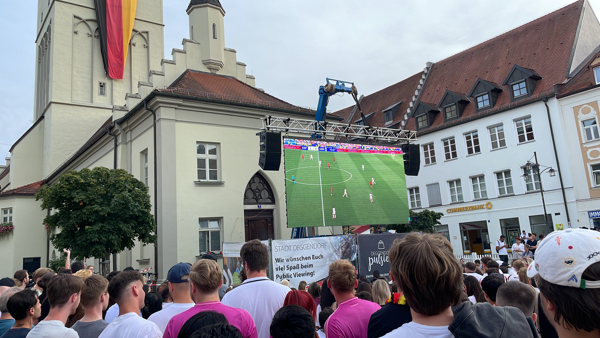

consider the image comes from drone camera, you have to identity the object which is in the middile of the picture and you need to the distance in m. 
  The Drone operator will use this distance to detemine the direction of drone so please be precise. If there is no object in the middile, or if you feel that the drone is safe to move towards the direction of the middile of the picture please return none. 
  Provide output in json format, no extra texts.

-------Response--------
<class 'dict'>
{'object': 'person', 'distance': 10}


In [15]:
# Download an image from Google Cloud Storage
! gsutil cp "gs://cloud-samples-data/generative-ai/image/320px-Felis_catus-cat_on_snow.jpg" ./image.jpg

# Load from local file
image = Image.load_from_file("/content/deg.JPG")

# Prepare contents
prompt = ["consider the image comes from drone camera, you have to identity the object which is in the middile of the picture and you need to the distance in m. \n ",
          "The Drone operator will use this distance to detemine the direction of drone so please be precise. If there is no object in the middile, or if you feel that the drone is safe to move towards the direction of the middile of the picture please return none. \n ",
          "Provide output in json format, no extra texts."]

contents = [image, " ".join(prompt)]

responses = multimodal_model.generate_content(contents, stream=False)

print("-------Prompt--------")
print_multimodal_prompt(contents)

print("\n-------Response--------")

v = eval(responses.candidates[0].content.parts[0].text.replace("```", "").replace("json", ""))
print(type(v))
print(v)



In [ ]:
!pip install Pillow


In [ ]:
!pip install opencv-python-headless
